In [2]:
%matplotlib inline

path = "../data/dogscats/redux/"

import os, json
import numpy as np
from glob import glob

import utils
reload(utils)
from utils import *

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [20]:
batch_size = 64

### TODO
How to train an algorithm for data
1. create validation and sample sets for training
2. move sample training data into separate dirs for each set
3. finetune and train
4. submit

### 1. create validation and sample sets for training
% = jupyter nb magic command

! = bash commands

In [3]:
!pwd

/home/ubuntu/fastai_coursenotes/nbs


In [4]:
%cd ../data/dogscats/redux

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [5]:
%mkdir sample
%mkdir sample/train
%mkdir sample/valid

In training dir (files downloaded from kaggle):
- Grab all jpg files
- Make a random permutation of them
- Move 2000 of them into valid dir

In [6]:
%cd train

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/train


In [7]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [8]:
from shutil import copyfile

Copy 200 training images into sample training dir

In [9]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

In [10]:
%cd ../valid

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/valid


Copy 200 training images into sample valid dir

In [11]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/valid/' + shuf[i])

### 2. move sample training data into separate dirs for each set

Turns out you need to create category setup for all training and valid data

In [12]:
!pwd

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/valid


In [13]:
%cd ../sample/valid

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/sample/valid


In [14]:
%mkdir cats
%mkdir dogs
%mv cat.* cats/
%mv dog.* dogs/

In [14]:
!pwd

/home/ubuntu/fastai_coursenotes/nbs


In [7]:
%cd ../data/dogscats/redux

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [17]:
%cd sample/train

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/sample/train


In [18]:
%mkdir cats
%mkdir dogs
%mv cat.* cats/
%mv dog.* dogs/

In [8]:
!pwd

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [21]:
%cd ../../../

/home/ubuntu/fastai_coursenotes/data/dogscats


In [22]:
% cd redux/valid

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/valid


In [23]:
%mkdir cats
%mkdir dogs
%mv cat.* cats/
%mv dog.* dogs/

In [25]:
cd ../train

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/train


In [26]:
%mkdir cats
%mkdir dogs
%mv cat.* cats/
%mv dog.* dogs/

now make an unknown class for the test set

In [27]:
!pwd

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/train


In [28]:
%cd ../test

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/test


In [29]:
%mkdir unknown
%mv *.jpg unknown/

### 3. finetune and train

In [18]:
from vgg16 import Vgg16

In [19]:
vgg = Vgg16()

In [24]:
print os.getcwd()

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [34]:
%cd ../

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [10]:
print os.getcwd()

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


in the future just do file management in bash... jeez

In [9]:
current_dir = os.getcwd()

In [25]:
SAMPLE_TRAIN_DIR = current_dir + '/sample/train'
SAMPLE_VALID_DIR = current_dir + '/sample/valid'
TRAIN_DIR = current_dir + '/train'
VALID_DIR = current_dir + '/valid'
TEST_DIR  = current_dir + '/test'

In [26]:
batches = vgg.get_batches(TRAIN_DIR, batch_size = batch_size)

Found 23000 images belonging to 2 classes.


In [27]:
val_batches = vgg.get_batches(VALID_DIR, batch_size = batch_size * 2)

Found 2000 images belonging to 2 classes.


In [28]:
vgg.finetune(batches)

In [29]:
vgg.model.optimizer.lr = 0.01

In [41]:
!pwd

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [42]:
%mkdir results

In [30]:
RESULTS_DIR = current_dir + '/results'

In [31]:
epochs = 3

In [32]:
for epoch in range(epochs):
    print "epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch = 1)
    weights_filename = 'weights%d_v2.h5' % epoch
    vgg.model.save_weights(RESULTS_DIR + '/' + weights_filename)
print "done with %s fit operations" % epochs

epoch: 0
Epoch 1/1
23000/23000 [==============================] - 707s - loss: 0.3569 - acc: 0.9697 - val_loss: 0.3115 - val_acc: 0.9755
epoch: 1
Epoch 1/1
23000/23000 [==============================] - 709s - loss: 0.3040 - acc: 0.9777 - val_loss: 0.2332 - val_acc: 0.9845
epoch: 2
Epoch 1/1
23000/23000 [==============================] - 709s - loss: 0.3134 - acc: 0.9779 - val_loss: 0.2316 - val_acc: 0.9825
done with 3 fit operations


### 3a. generate predictions

In [34]:
batches, preds = vgg.test(TEST_DIR, batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


In [35]:
print preds[:5]

[[  1.0000e+00   0.0000e+00]
 [  1.0000e+00   6.8434e-38]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00]]


In [36]:
filenames = batches.filenames

In [37]:
print filenames[:5]

['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


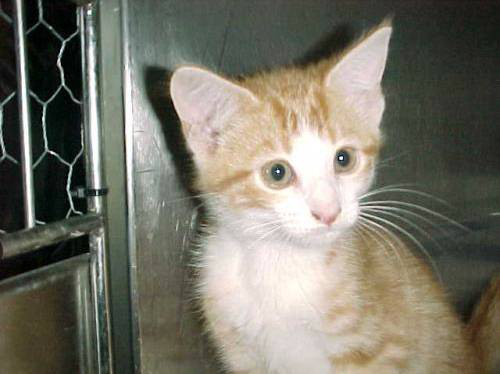

In [41]:
from PIL import Image
Image.open(TEST_DIR + "/" + filenames[3])

In [42]:
save_array(RESULTS_DIR + '/test_preds_v2.dat', preds)
save_array(RESULTS_DIR + '/filenames_v2.dat', filenames)

### 3b. validate predictions

In [43]:
vgg.model.load_weights(RESULTS_DIR + '/weights2_v2.h5')

In [44]:
val_batches, probs = vgg.test(VALID_DIR, batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [45]:
filenames = val_batches.filenames
expected_labels = val_batches.classes

our_predictions = probs[:,0]
our_labels = np.round(1 - our_predictions)

In [46]:
from keras.preprocessing import image

In [47]:
def plots_idx(idx, titles=None):
    plots([image.load_img(VALID_DIR + "/" + filenames[i]) for i in idx], titles = titles)

n_view = 4

these should be correct labels

found 1969 correct labels


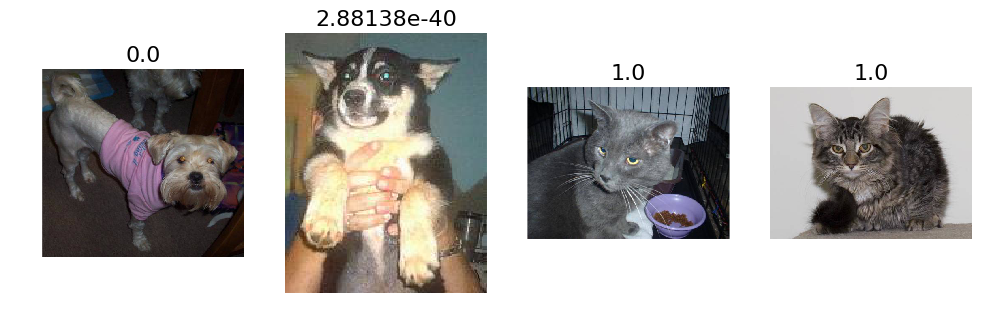

In [48]:
correct = np.where(our_labels == expected_labels)[0]
print "found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

these should be incorrect labels

found 31 incorrect labels


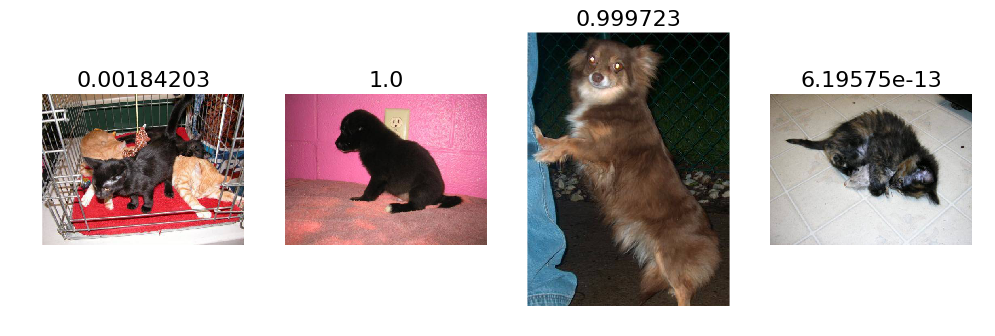

In [49]:
incorrect = np.where(our_labels != expected_labels)[0]
print "found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

these images were most confidently cat images

found 1021 correct cats


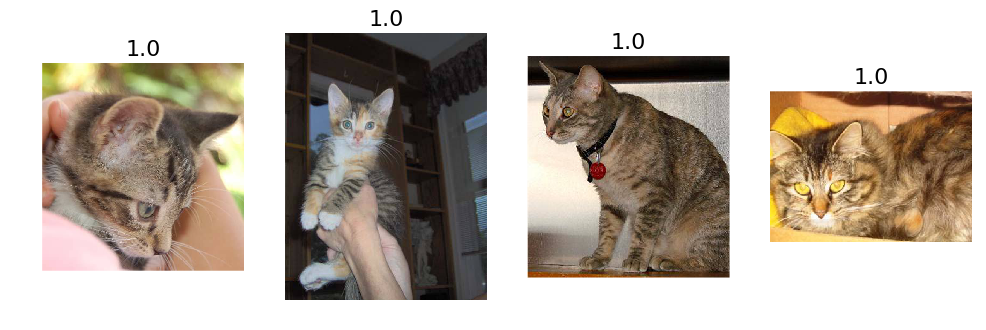

In [50]:
correct_cats = np.where((our_labels == 0) & (our_labels == expected_labels))[0]
print "found %d correct cats" % len(correct_cats)
idx = permutation(correct_cats)[:n_view]
plots_idx(idx, our_predictions[idx])

these images were most confidently dogs

found 948 correct dogs


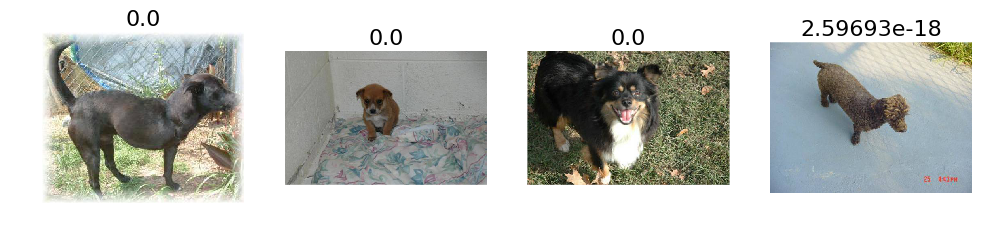

In [51]:
correct_dogs = np.where((our_labels == 1) & (our_labels == expected_labels))[0]
print "found %d correct dogs" % len(correct_dogs)
idx = permutation(correct_dogs)[:n_view]
plots_idx(idx, our_predictions[idx])

these images were confidently cats but are really dogs

found 17 incorrect cats


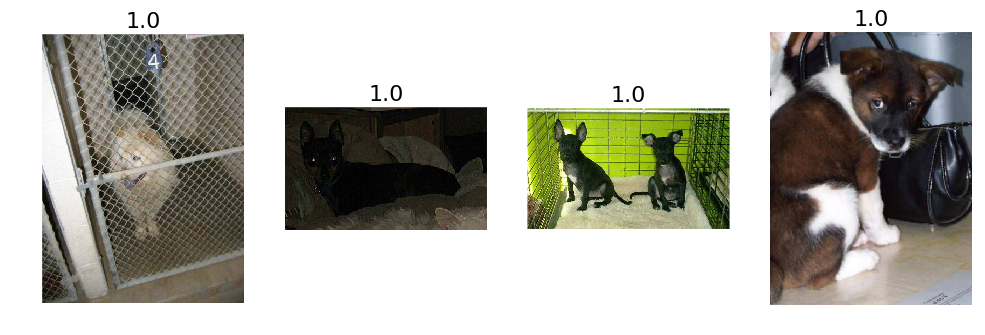

In [52]:
incorrect_cats = np.where((our_labels == 0) & (our_labels != expected_labels))[0]
print "found %d incorrect cats" % len(incorrect_cats)
idx = permutation(incorrect_cats)[:n_view]
plots_idx(idx, our_predictions[idx])

these images were confidently dogs but are really cats

found 14 incorrect dogs


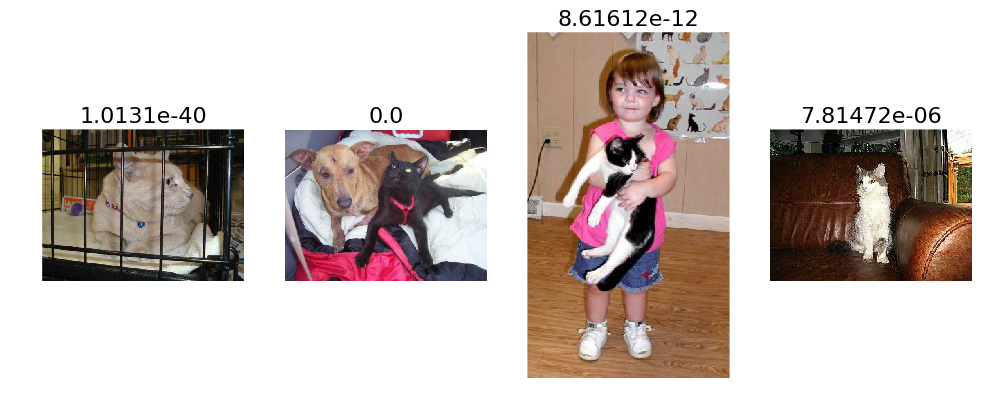

In [53]:
incorrect_dogs = np.where((our_labels == 1) & (our_labels != expected_labels))[0]
print "found %d incorrect dogs" % len(incorrect_dogs)
idx = permutation(incorrect_dogs)[:n_view]
plots_idx(idx, our_predictions[idx])

most uncertain images

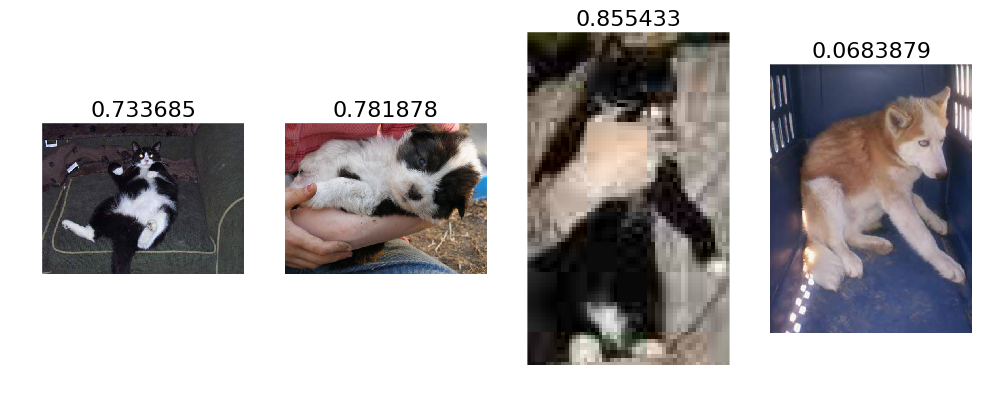

In [54]:
uncertain = np.argsort(np.abs(our_predictions - 0.5))
plots_idx(uncertain[:n_view], our_predictions[uncertain])

### 4. submit

In [55]:
preds = load_array(RESULTS_DIR + '/test_preds_v2.dat')
filenames = load_array(RESULTS_DIR + '/filenames_v2.dat')

need to format output in terms of imageId, isDog (.csv file)

In [56]:
isdog = preds[:,1]
print "raw: " + str(isdog[:5])
print "mid: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "edg: " + str(isdog[(isdog == 1) | (isdog == 0)])

raw: [  0.0000e+00   6.8434e-38   0.0000e+00   0.0000e+00   1.0000e+00]
mid: [ 0.4617  0.4655  0.4325]
edg: [ 0.  0.  0. ...,  0.  0.  1.]


this is to avoid log loss issues for edge case (0, 1) predictions

In [57]:
isdog = isdog.clip(min = 0.025, max = 0.975)

In [58]:
filenames = batches.filenames

look into these sweet sweet array operations

In [59]:
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [60]:
subm = np.stack([ids, isdog], axis = 1)
subm[:5]

array([[  9.2920e+03,   2.5000e-02],
       [  1.2026e+04,   2.5000e-02],
       [  9.6880e+03,   2.5000e-02],
       [  4.3920e+03,   2.5000e-02],
       [  7.7900e+02,   9.7500e-01]])

In [88]:
!pwd

/home/ubuntu/fastai_coursenotes/data/dogscats/redux


In [61]:
sub_file_name = 'sub2.csv'
np.savetxt(sub_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [62]:
from IPython.display import FileLink
FileLink(current_dir + "/" + sub_file_name)

/home/ubuntu/fastai_coursenotes/data/dogscats/redux/sub2.csv

result was .11144 ... how to make this better???

### for future reference
- split into filesystem actions and programming actions
- do filesystem actions first or just in bash

In [33]:
#generally how to set up the dirs
#.
#├── results
#│   ├── filenames.dat
#│   │   ├── data
#│   │   └── meta
#│   └── test_preds.dat
#│       ├── data
#│       └── meta
#├── sample
#│   ├── train
#│   │   ├── cats
#│   │   └── dogs
#│   └── valid
#│       ├── cats
#│       └── dogs
#├── test
#│   └── unknown
#├── train
#│   ├── cats
#│   └── dogs
#└── valid
#    ├── cats
#    └── dogs